## Assignment 

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

## Read the Dataset

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

## Cheack missing values

In [4]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

## Seprate X and Y

In [5]:
X = df.drop(columns=['id','Product ID','Machine failure'])
Y = df[['Machine failure']]

In [6]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [7]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [8]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

## Seprate cat and con from X

In [9]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [10]:
cat

['Type']

In [11]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

## Preprocessing


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
# Create a num pipeline
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

# Create a cat pipe
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='unkown')),
                           ('ordinal',OrdinalEncoder())])

# Combine the both Pipeline
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [14]:
x_pre = pre.fit_transform(X)
x_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [15]:
cols = pre.get_feature_names_out()
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [16]:
x_pre = pd.DataFrame(x_pre,columns=cols)
x_pre

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127386,1.053251,0.069693,-0.335048,1.650769,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
136425,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0
136426,0.342182,1.342025,0.026445,-0.217431,1.713303,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
136427,0.986567,0.692284,-0.528565,0.699979,-0.975676,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0


## Features Selection with mutual information

In [17]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(x_pre,Y)
mi

array([0.00517738, 0.00165604, 0.01904986, 0.02001324, 0.00685178,
       0.00761849, 0.02469744, 0.01117589, 0.01897869, 0.00131296,
       0.01087876])

In [18]:
mi = pd.Series(mi)
mi.index = x_pre.columns
mi = mi.sort_values(ascending=False)
mi

num__HDF                        0.024697
num__Torque [Nm]                0.020013
num__Rotational speed [rpm]     0.019050
num__OSF                        0.018979
num__PWF                        0.011176
cat__Type                       0.010879
num__TWF                        0.007618
num__Tool wear [min]            0.006852
num__Air temperature [K]        0.005177
num__Process temperature [K]    0.001656
num__RNF                        0.001313
dtype: float64

In [19]:
mi.index

Index(['num__HDF', 'num__Torque [Nm]', 'num__Rotational speed [rpm]',
       'num__OSF', 'num__PWF', 'cat__Type', 'num__TWF', 'num__Tool wear [min]',
       'num__Air temperature [K]', 'num__Process temperature [K]', 'num__RNF'],
      dtype='object')

<Axes: title={'center': 'Count plot for Mutual information'}>

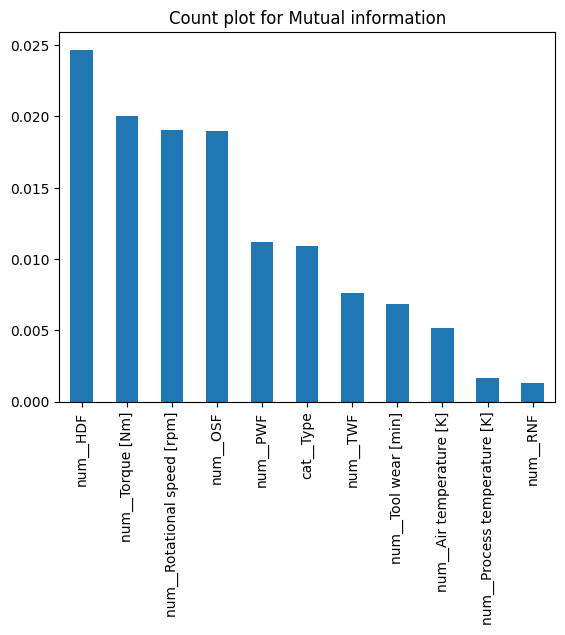

In [20]:
mi.plot(kind='bar',title='Count plot for Mutual information')

In [21]:
sel_col = list(mi.index[0:5])
sel_col

['num__HDF',
 'num__Torque [Nm]',
 'num__Rotational speed [rpm]',
 'num__OSF',
 'num__PWF']

In [22]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif,k=5)
sel_feature = sel.fit_transform(x_pre,Y)
sel_cols = sel.get_feature_names_out()

In [23]:
sel

SelectKBest(k=5,
            score_func=<function mutual_info_classif at 0x0000027DDBF776A0>)

In [24]:
sel_feature

array([[ 0.54541592, -0.49971115, -0.07202055, -0.04901642, -0.06303833],
       [ 1.72030819, -1.32302768, -0.07202055, -0.04901642, -0.06303833],
       [ 2.05187289, -1.62883096, -0.07202055, -0.04901642, -0.06303833],
       ...,
       [ 0.0264451 , -0.2174312 , -0.07202055, -0.04901642, -0.06303833],
       [-0.52856537,  0.69997864, -0.07202055, -0.04901642, -0.06303833],
       [ 0.26430672, -0.12333789, -0.07202055, -0.04901642, -0.06303833]])

In [25]:
sel_cols

array(['num__Rotational speed [rpm]', 'num__Torque [Nm]', 'num__HDF',
       'num__PWF', 'num__OSF'], dtype=object)

## Extract  important Columns

In [26]:
sel_cols[0].split('__')[1]

'Rotational speed [rpm]'

In [27]:
imp_col = []
for i in sel_cols:
    s =  i.split('__')[1]
    imp_col.append(s)

In [28]:
imp_col

['Rotational speed [rpm]', 'Torque [Nm]', 'HDF', 'PWF', 'OSF']

In [29]:
X_sel = X[imp_col]
X_sel

,Rotational speed [rpm],Torque [Nm],HDF,PWF,OSF
0,1596,36.1,0,0,0
1,1759,29.1,0,0,0
2,1805,26.5,0,0,0
3,1524,44.3,0,0,0
4,1641,35.4,0,0,0
...,...,...,...,...,...
136424,1530,37.5,0,0,0
136425,1447,49.1,0,0,0
136426,1524,38.5,0,0,0
136427,1447,46.3,0,0,0


## Create a pipline

In [30]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [31]:
cat_sel

[]

In [32]:
con_sel

['Rotational speed [rpm]', 'Torque [Nm]', 'HDF', 'PWF', 'OSF']

In [69]:
## num pipe
num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                            ('scaler',StandardScaler())])
## cat pipe
cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

## combine
pre2 = ColumnTransformer([('num',num_pipe2,con_sel),
                          ('cat',cat_pipe2,cat_sel)])

In [59]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre

array([[ 0.54541592, -0.49971115, -0.07202055, -0.04901642, -0.06303833],
       [ 1.72030819, -1.32302768, -0.07202055, -0.04901642, -0.06303833],
       [ 2.05187289, -1.62883096, -0.07202055, -0.04901642, -0.06303833],
       ...,
       [ 0.0264451 , -0.2174312 , -0.07202055, -0.04901642, -0.06303833],
       [-0.52856537,  0.69997864, -0.07202055, -0.04901642, -0.06303833],
       [ 0.26430672, -0.12333789, -0.07202055, -0.04901642, -0.06303833]])

In [60]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Rotational speed [rpm]', 'num__Torque [Nm]', 'num__HDF',
       'num__PWF', 'num__OSF'], dtype=object)

In [61]:
X_sel_pre = pd.DataFrame(X_sel_pre,columns=final_cols)
X_sel_pre

,num__Rotational speed [rpm],num__Torque [Nm],num__HDF,num__PWF,num__OSF
0,0.545416,-0.499711,-0.072021,-0.049016,-0.063038
1,1.720308,-1.323028,-0.072021,-0.049016,-0.063038
2,2.051873,-1.628831,-0.072021,-0.049016,-0.063038
3,0.026445,0.464745,-0.072021,-0.049016,-0.063038
4,0.869773,-0.582043,-0.072021,-0.049016,-0.063038
...,...,...,...,...,...
136424,0.069693,-0.335048,-0.072021,-0.049016,-0.063038
136425,-0.528565,1.029305,-0.072021,-0.049016,-0.063038
136426,0.026445,-0.217431,-0.072021,-0.049016,-0.063038
136427,-0.528565,0.699979,-0.072021,-0.049016,-0.063038


## Apply train test split

In [70]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_sel_pre,Y,test_size=0.20,random_state=21)

In [71]:
xtrain.shape

(109143, 5)

In [72]:
xtest.shape

(27286, 5)

## Algorithem Evaluation

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


In [74]:
dct = {'Logistic':LinearRegression(),
       'Decision Tree':DecisionTreeClassifier(),
       'Random Forest':RandomForestClassifier(),
       'Gradient Boost':GradientBoostingClassifier()}

In [75]:
dct.items()

dict_items([('Logistic', LinearRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier())])

In [78]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict train and test results
    ypred_tr =model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate F1 score in training
    f1_tr = f1_score(ytrain,ypred_tr)
    tr.append(f1_tr)
    # Calculate F1 Score in train Cross validated
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1')
    f1_cv = scores.mean()
    tr_cv.append(f1_cv)
    # Calculate F1 score in testing
    f1_ts = f1_score(ytest, ypred_ts)
    ts.append(f1_ts)
    # Print the results for model
    print(f'Model Name : {name}\n')
    print(f'Training F1 : {f1_tr:.4f}')
    print(f'Training F1 CV : {f1_cv:.4f}')
    print(f'Testing F1 : {f1_ts:.4f}')
    print('\n=================================================\n')

ValueError: Classification metrics can't handle a mix of binary and continuous targets